# Import Library




In [ ]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score, roc_curve, auc, precision_score, f1_score

# Extract File

In [ ]:
local_zip = '/content/bank+marketing.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
local_zip = '/content/bank.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
local_zip = '/content/bank-additional.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Isi Dataset :
1.  **age**: Usia nasabah.
2.  **job**: Jenis pekerjaan nasabah (misalnya: `"admin."`, `"blue-collar"`, `"management"`).
3.  **marital**: Status perkawinan nasabah (`"married"`, `"single"`, `"divorced"`).
4.  **education**: Tingkat pendidikan nasabah (`"primary"`, `"secondary"`, `"tertiary"`).
5.  **default**: Apakah nasabah memiliki kredit macet (`"yes"`, `"no"`).
6.  **balance**: Saldo rata-rata tahunan nasabah dalam euro.
7.  **housing**: Apakah nasabah memiliki pinjaman perumahan (`"yes"`, `"no"`).
8.  **loan**: Apakah nasabah memiliki pinjaman pribadi (`"yes"`, `"no"`).
9.  **contact**: Jenis komunikasi kontak terakhir (`"cellular"`, `"telephone"`).
10. **day**: Hari terakhir nasabah dihubungi dalam sebulan.
11. **month**: Bulan terakhir nasabah dihubungi dalam setahun (`"jan"`, `"feb"`, dll.).
12. **duration**: Durasi kontak terakhir dalam detik.
13. **campaign**: Jumlah kontak yang dilakukan selama kampanye ini untuk nasabah ini.
14. **pdays**: Jumlah hari yang berlalu setelah nasabah terakhir dihubungi dari kampanye sebelumnya (-1 berarti belum pernah dihubungi).
15. **previous**: Jumlah kontak yang dilakukan sebelum kampanye ini untuk nasabah ini.
16. **poutcome**: Hasil dari kampanye pemasaran sebelumnya (`"success"`, `"failure"`, `"other"`).
17. **y**: Apakah nasabah berlangganan deposito berjangka (`"yes"`, `"no"`).

In [ ]:
df = pd.read_csv('/content/bank-additional/bank-additional-full.csv', sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df1 = pd.read_csv('/content/bank-additional/bank-additional.csv', sep = ";")
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.duplicated().sum()

np.int64(12)

# Explorary Data Analysis

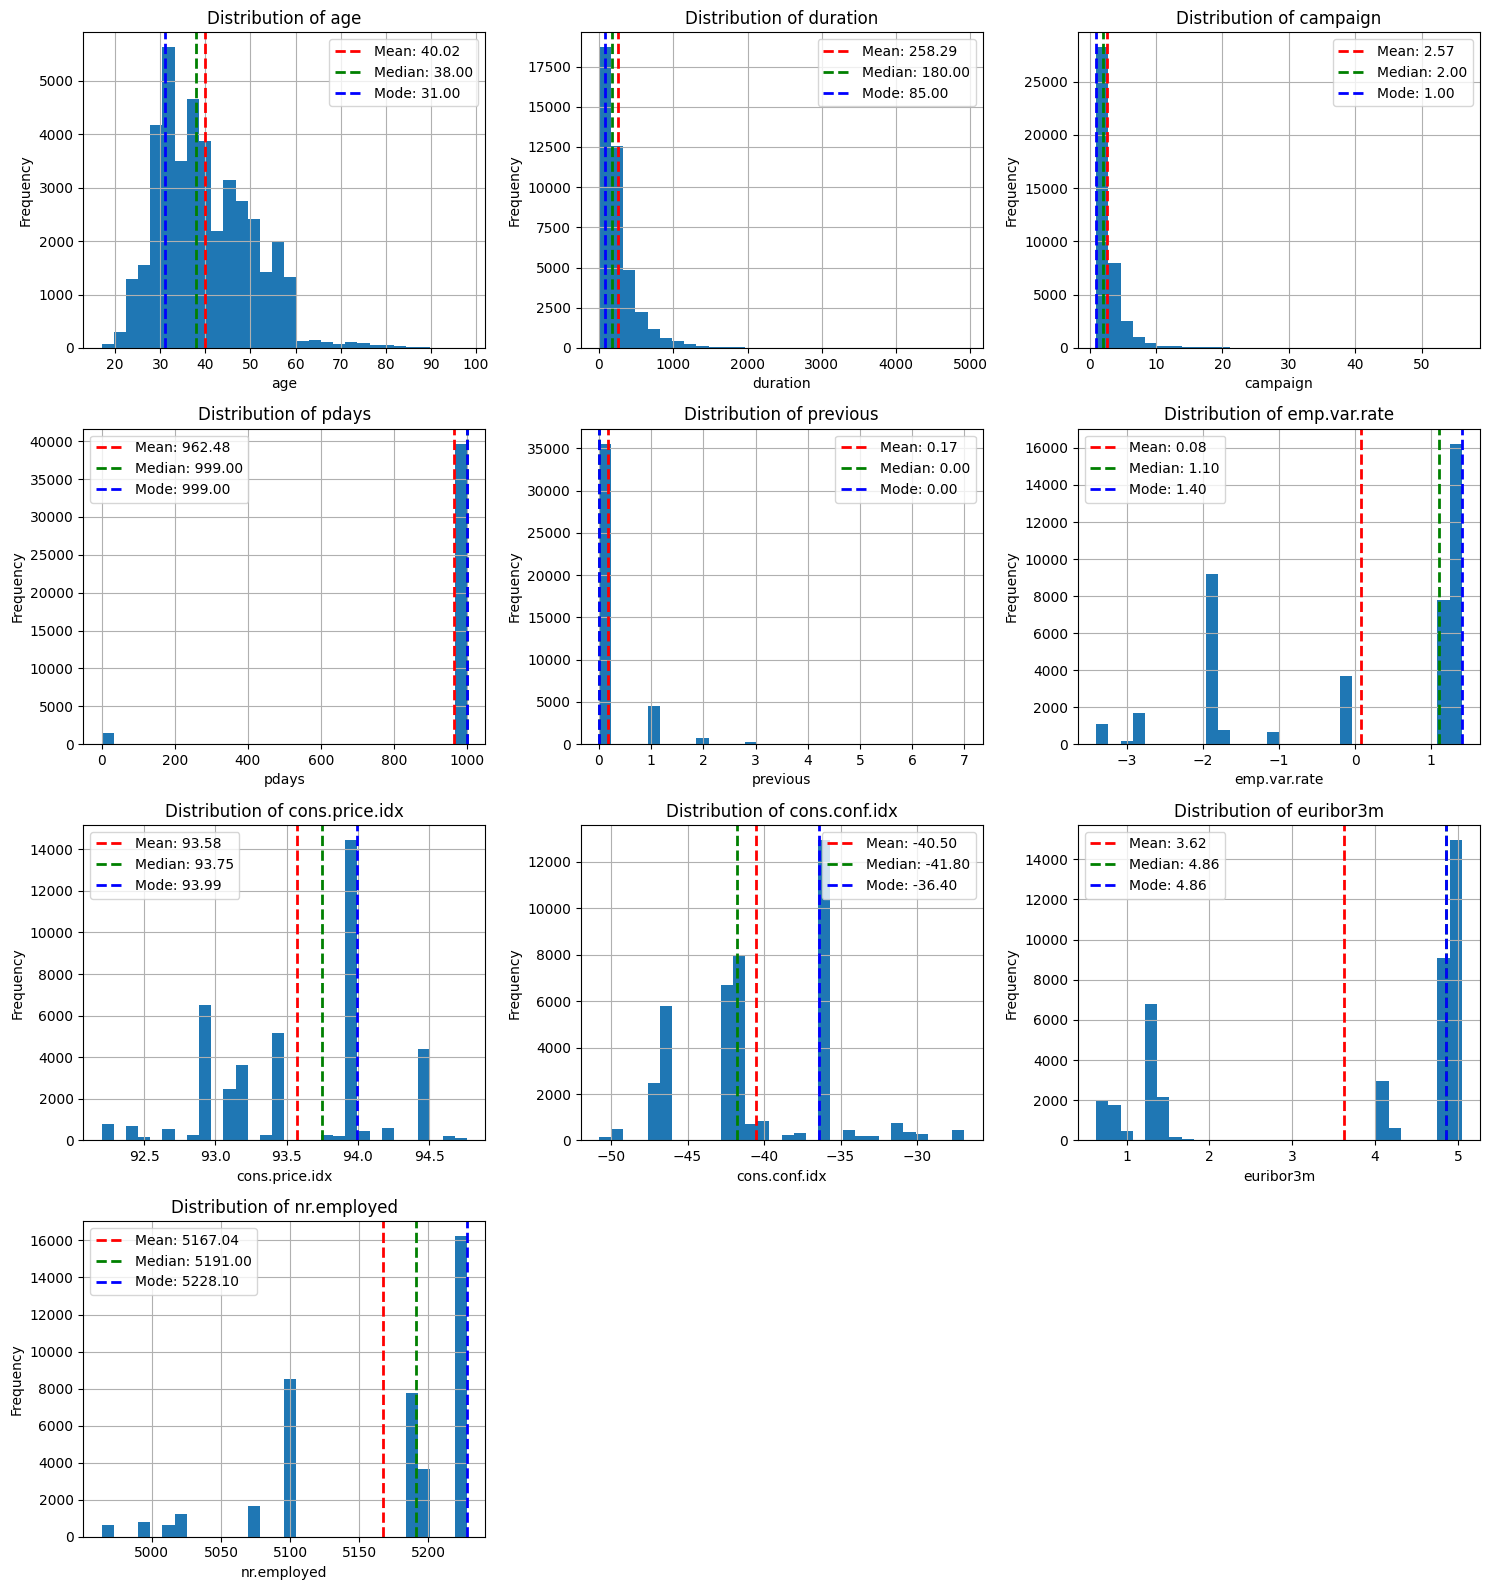

In [ ]:

numerical_cols = df.select_dtypes(include=np.number).columns
n_cols = len(numerical_cols)


n_plots_per_row = 3

n_rows = math.ceil(n_cols / n_plots_per_row)


fig, axes = plt.subplots(n_rows, n_plots_per_row, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]

    df[col].hist(bins=30, ax=ax)

    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]

    ax.axvline(mean_val, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.axvline(mode_val, color='b', linestyle='dashed', linewidth=2, label=f'Mode: {mode_val:.2f}')

    ax.legend()

for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

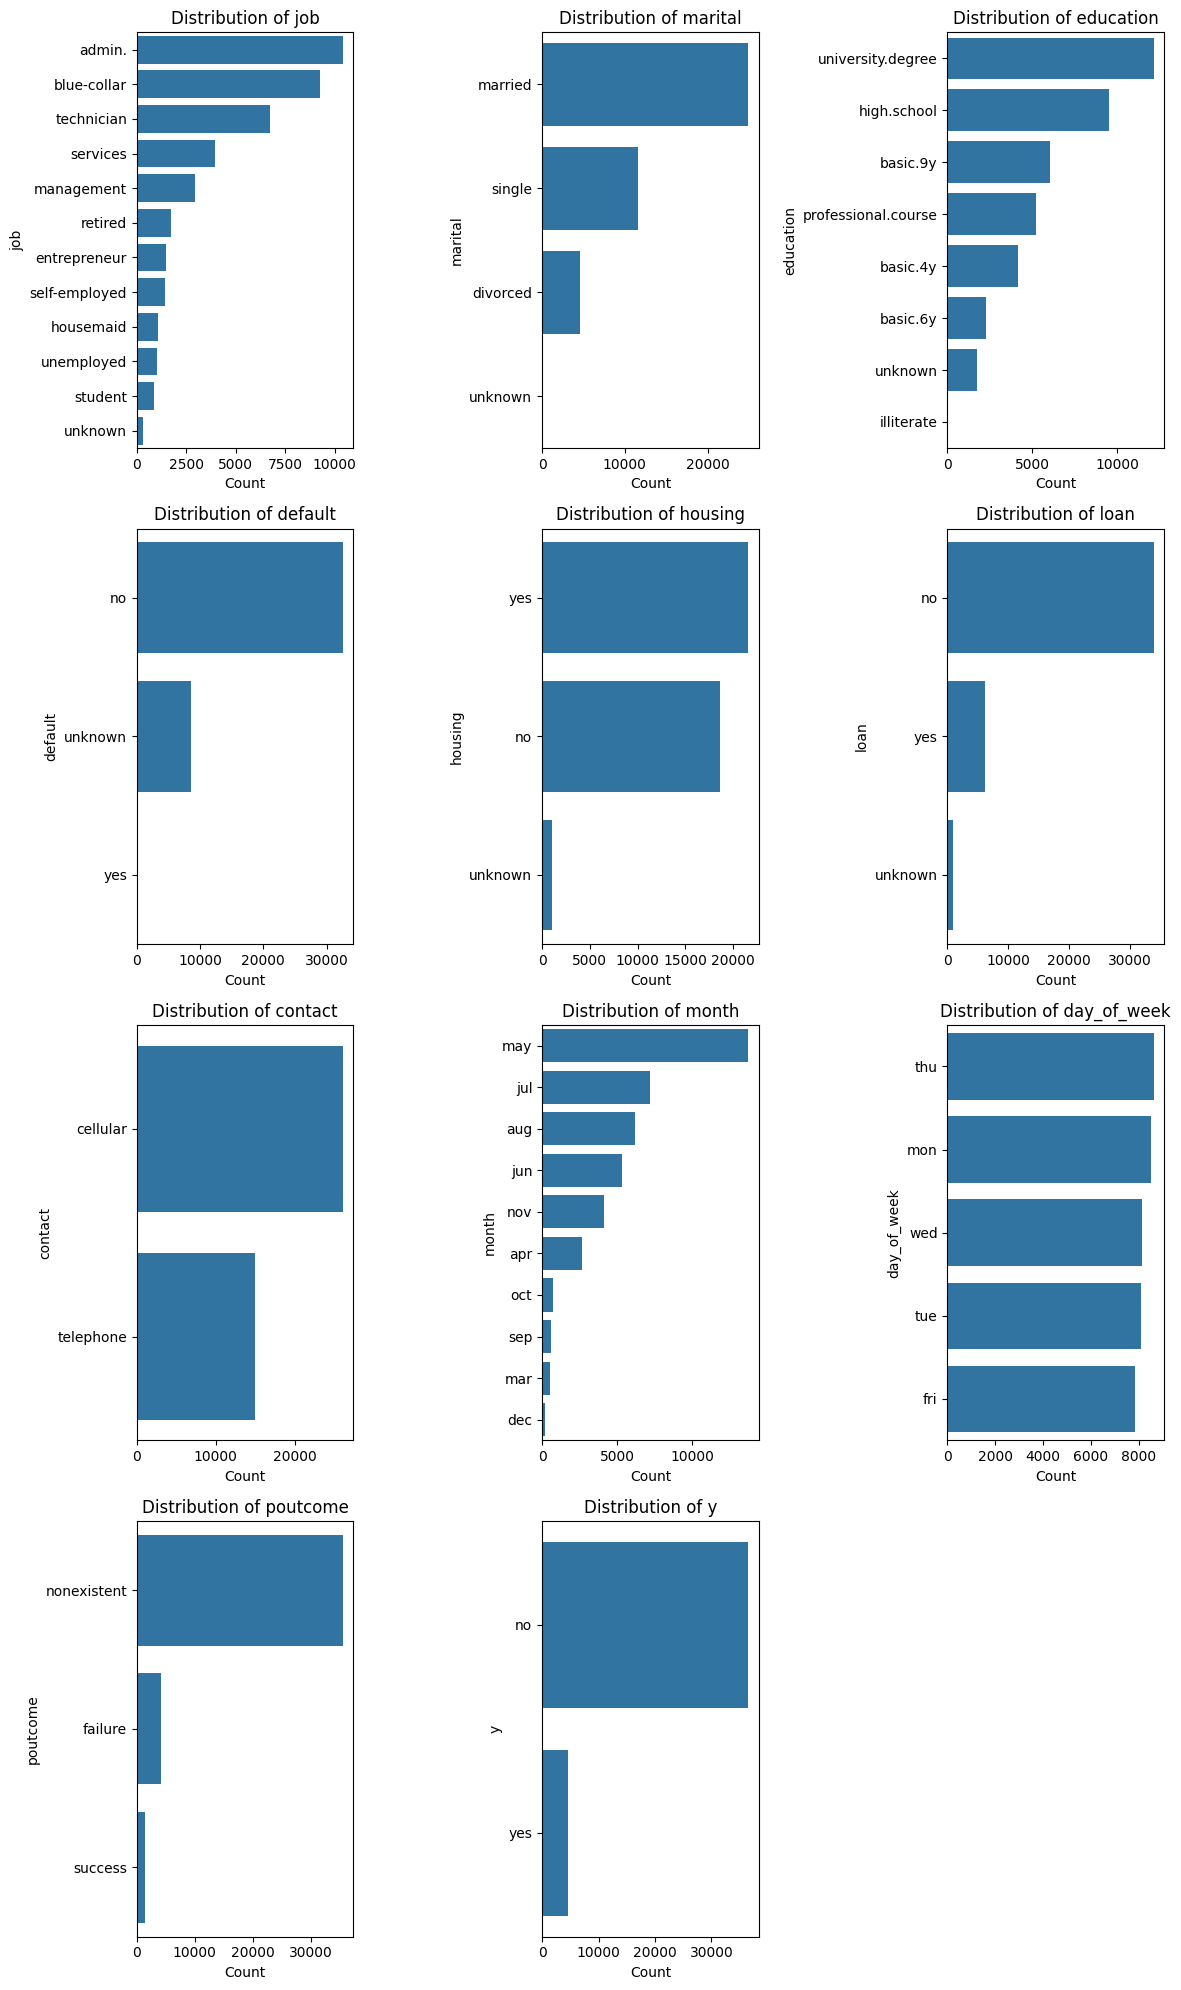

In [ ]:

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
n_cols = len(categorical_cols)


n_rows = math.ceil(n_cols / n_plots_per_row)

fig, axes = plt.subplots(n_rows, n_plots_per_row, figsize=(12, n_rows * 5))

if n_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]

    order = df[col].value_counts().index

    sns.countplot(data=df, y=col, order=order, ax=ax)

    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('Count')
    ax.set_ylabel(col)

for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Data Preprocessing

In [ ]:
for col in categorical_cols:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values for column 'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------
Unique values for column 'marital':
['married' 'single' 'divorced' 'unknown']
------------------------------
Unique values for column 'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------------------------------
Unique values for column 'default':
['no' 'unknown' 'yes']
------------------------------
Unique values for column 'housing':
['no' 'yes' 'unknown']
------------------------------
Unique values for column 'loan':
['no' 'yes' 'unknown']
------------------------------
Unique values for column 'contact':
['telephone' 'cellular']
------------------------------
Unique values for column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
------------------------------
Unique v

In [ ]:
df.loc[df['default'] == 'unknown', 'default'] = 'yes'

In [ ]:
for col in categorical_cols:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values for column 'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------
Unique values for column 'marital':
['married' 'single' 'divorced' 'unknown']
------------------------------
Unique values for column 'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------------------------------
Unique values for column 'default':
['no' 'yes']
------------------------------
Unique values for column 'housing':
['no' 'yes' 'unknown']
------------------------------
Unique values for column 'loan':
['no' 'yes' 'unknown']
------------------------------
Unique values for column 'contact':
['telephone' 'cellular']
------------------------------
Unique values for column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
------------------------------
Unique values for 

In [ ]:
df = df[df['job'] != 'unknown']

In [ ]:
df = df[df['marital'] != 'unknown']
df = df[df['housing'] != 'unknown']
df = df[df['loan'] != 'unknown']

In [ ]:
basic_cats = ['basic.9y', 'basic.6y', 'basic.4y']

df['education'] = df['education'].replace(basic_cats, 'basic')

In [ ]:
df['education'] = df['education'].replace('illiterate', 'basic')

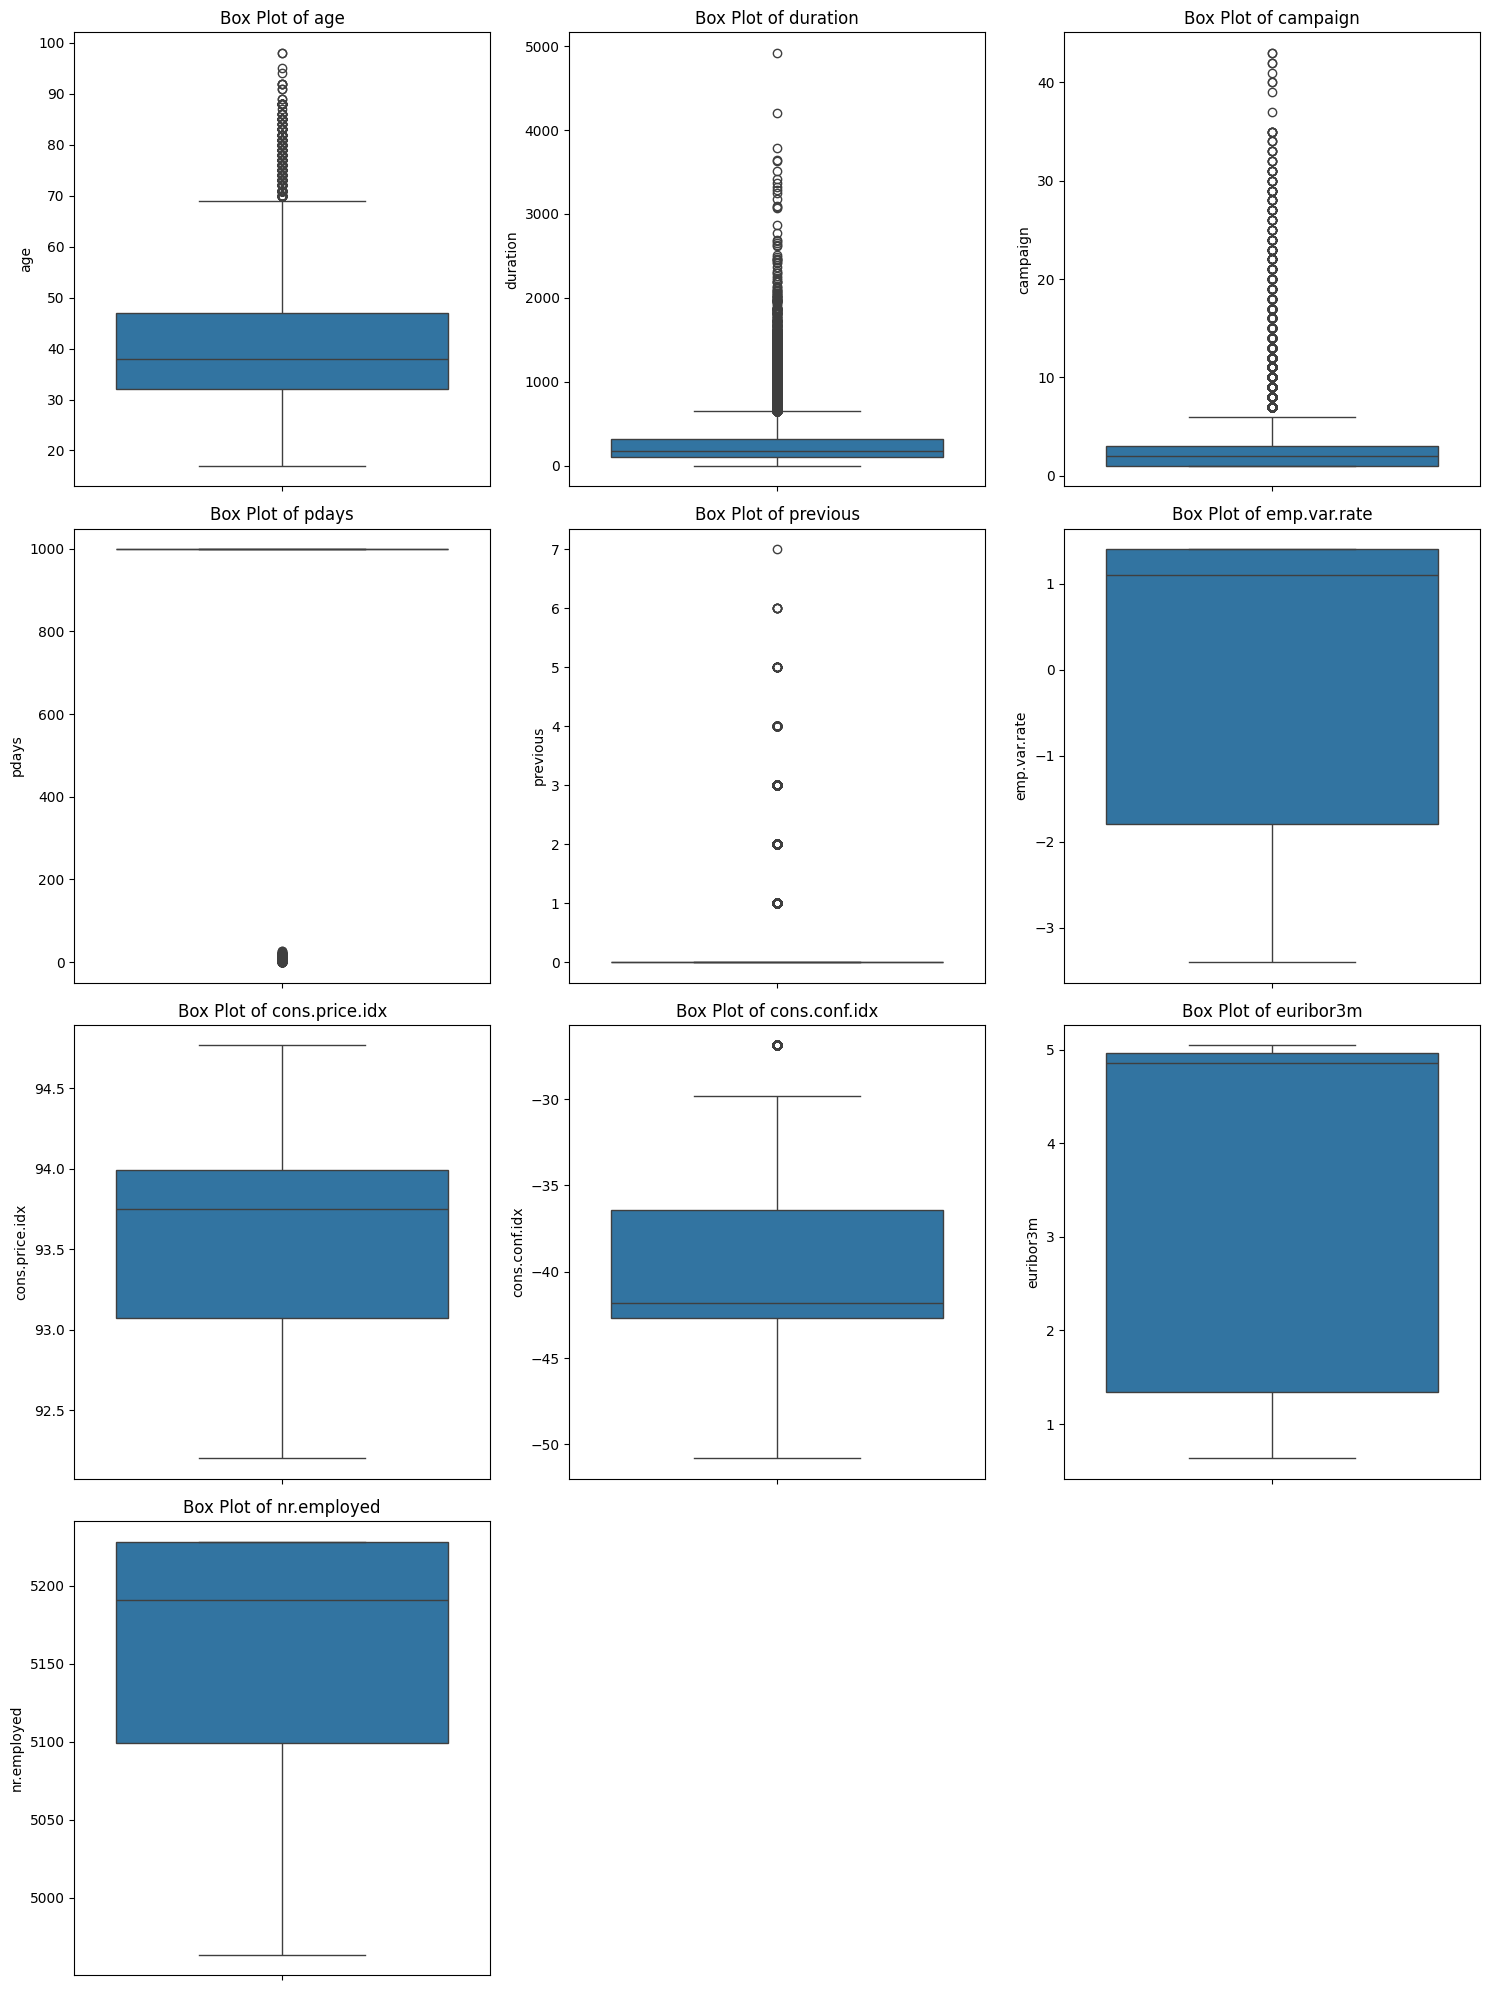

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
n_cols = len(numerical_cols)
n_plots_per_row = 3
n_rows = math.ceil(n_cols / n_plots_per_row)

fig, axes = plt.subplots(n_rows, n_plots_per_row, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Box Plot of {col}')
    ax.set_ylabel(col)

for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# numerical_cols = df.select_dtypes(include=np.number).columns

# for col in numerical_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# print("Jumlah baris setelah menangani outlier:", len(df))

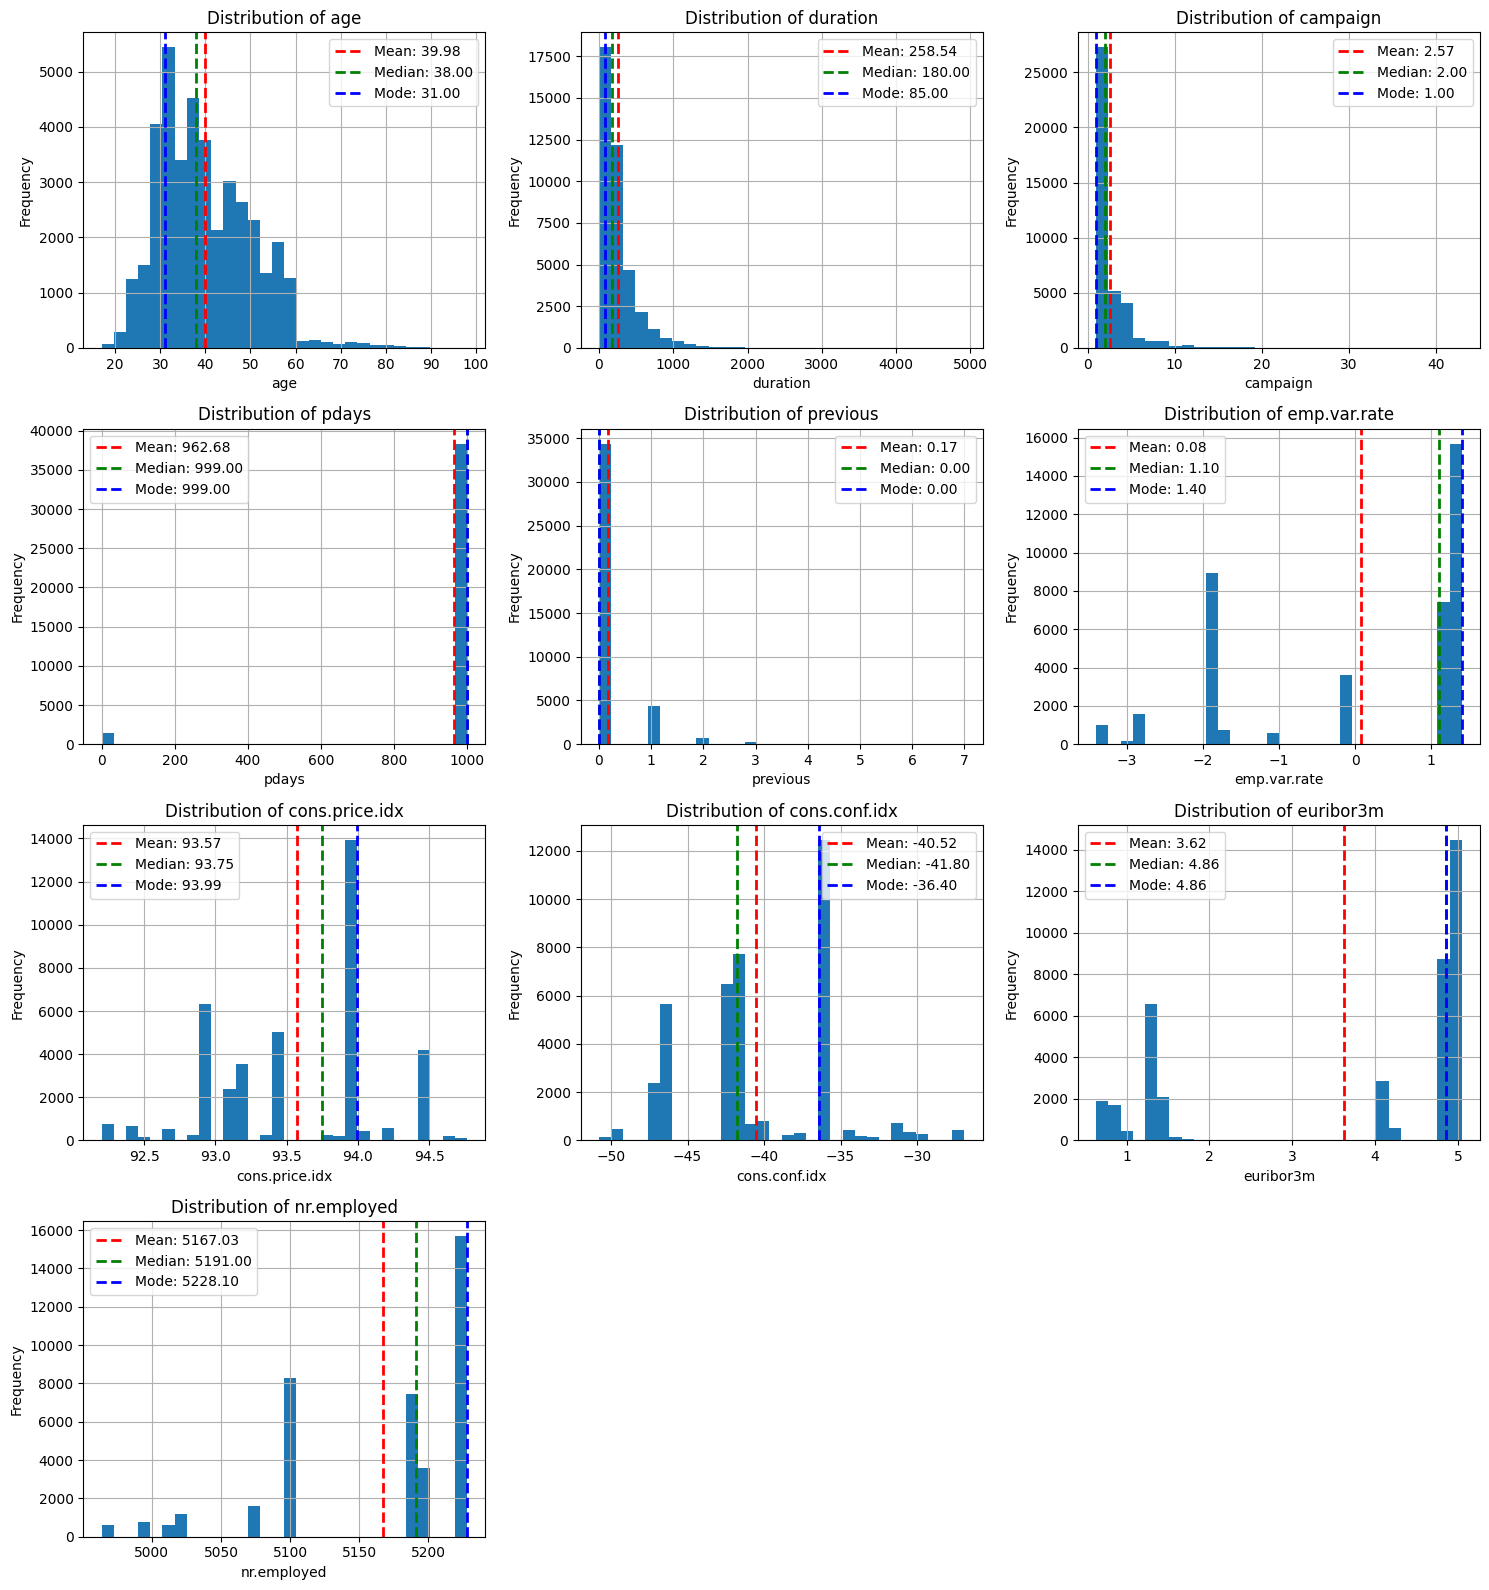

In [ ]:

numerical_cols = df.select_dtypes(include=np.number).columns
n_cols = len(numerical_cols)


n_plots_per_row = 3

n_rows = math.ceil(n_cols / n_plots_per_row)


fig, axes = plt.subplots(n_rows, n_plots_per_row, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]

    df[col].hist(bins=30, ax=ax)

    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]

    ax.axvline(mean_val, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.axvline(mode_val, color='b', linestyle='dashed', linewidth=2, label=f'Mode: {mode_val:.2f}')

    ax.legend()

for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# categorical_cols = df.select_dtypes(include=['object']).columns

# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# bool_cols = df.select_dtypes(include=['bool']).columns
# df[bool_cols] = df[bool_cols].astype(int)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,1,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


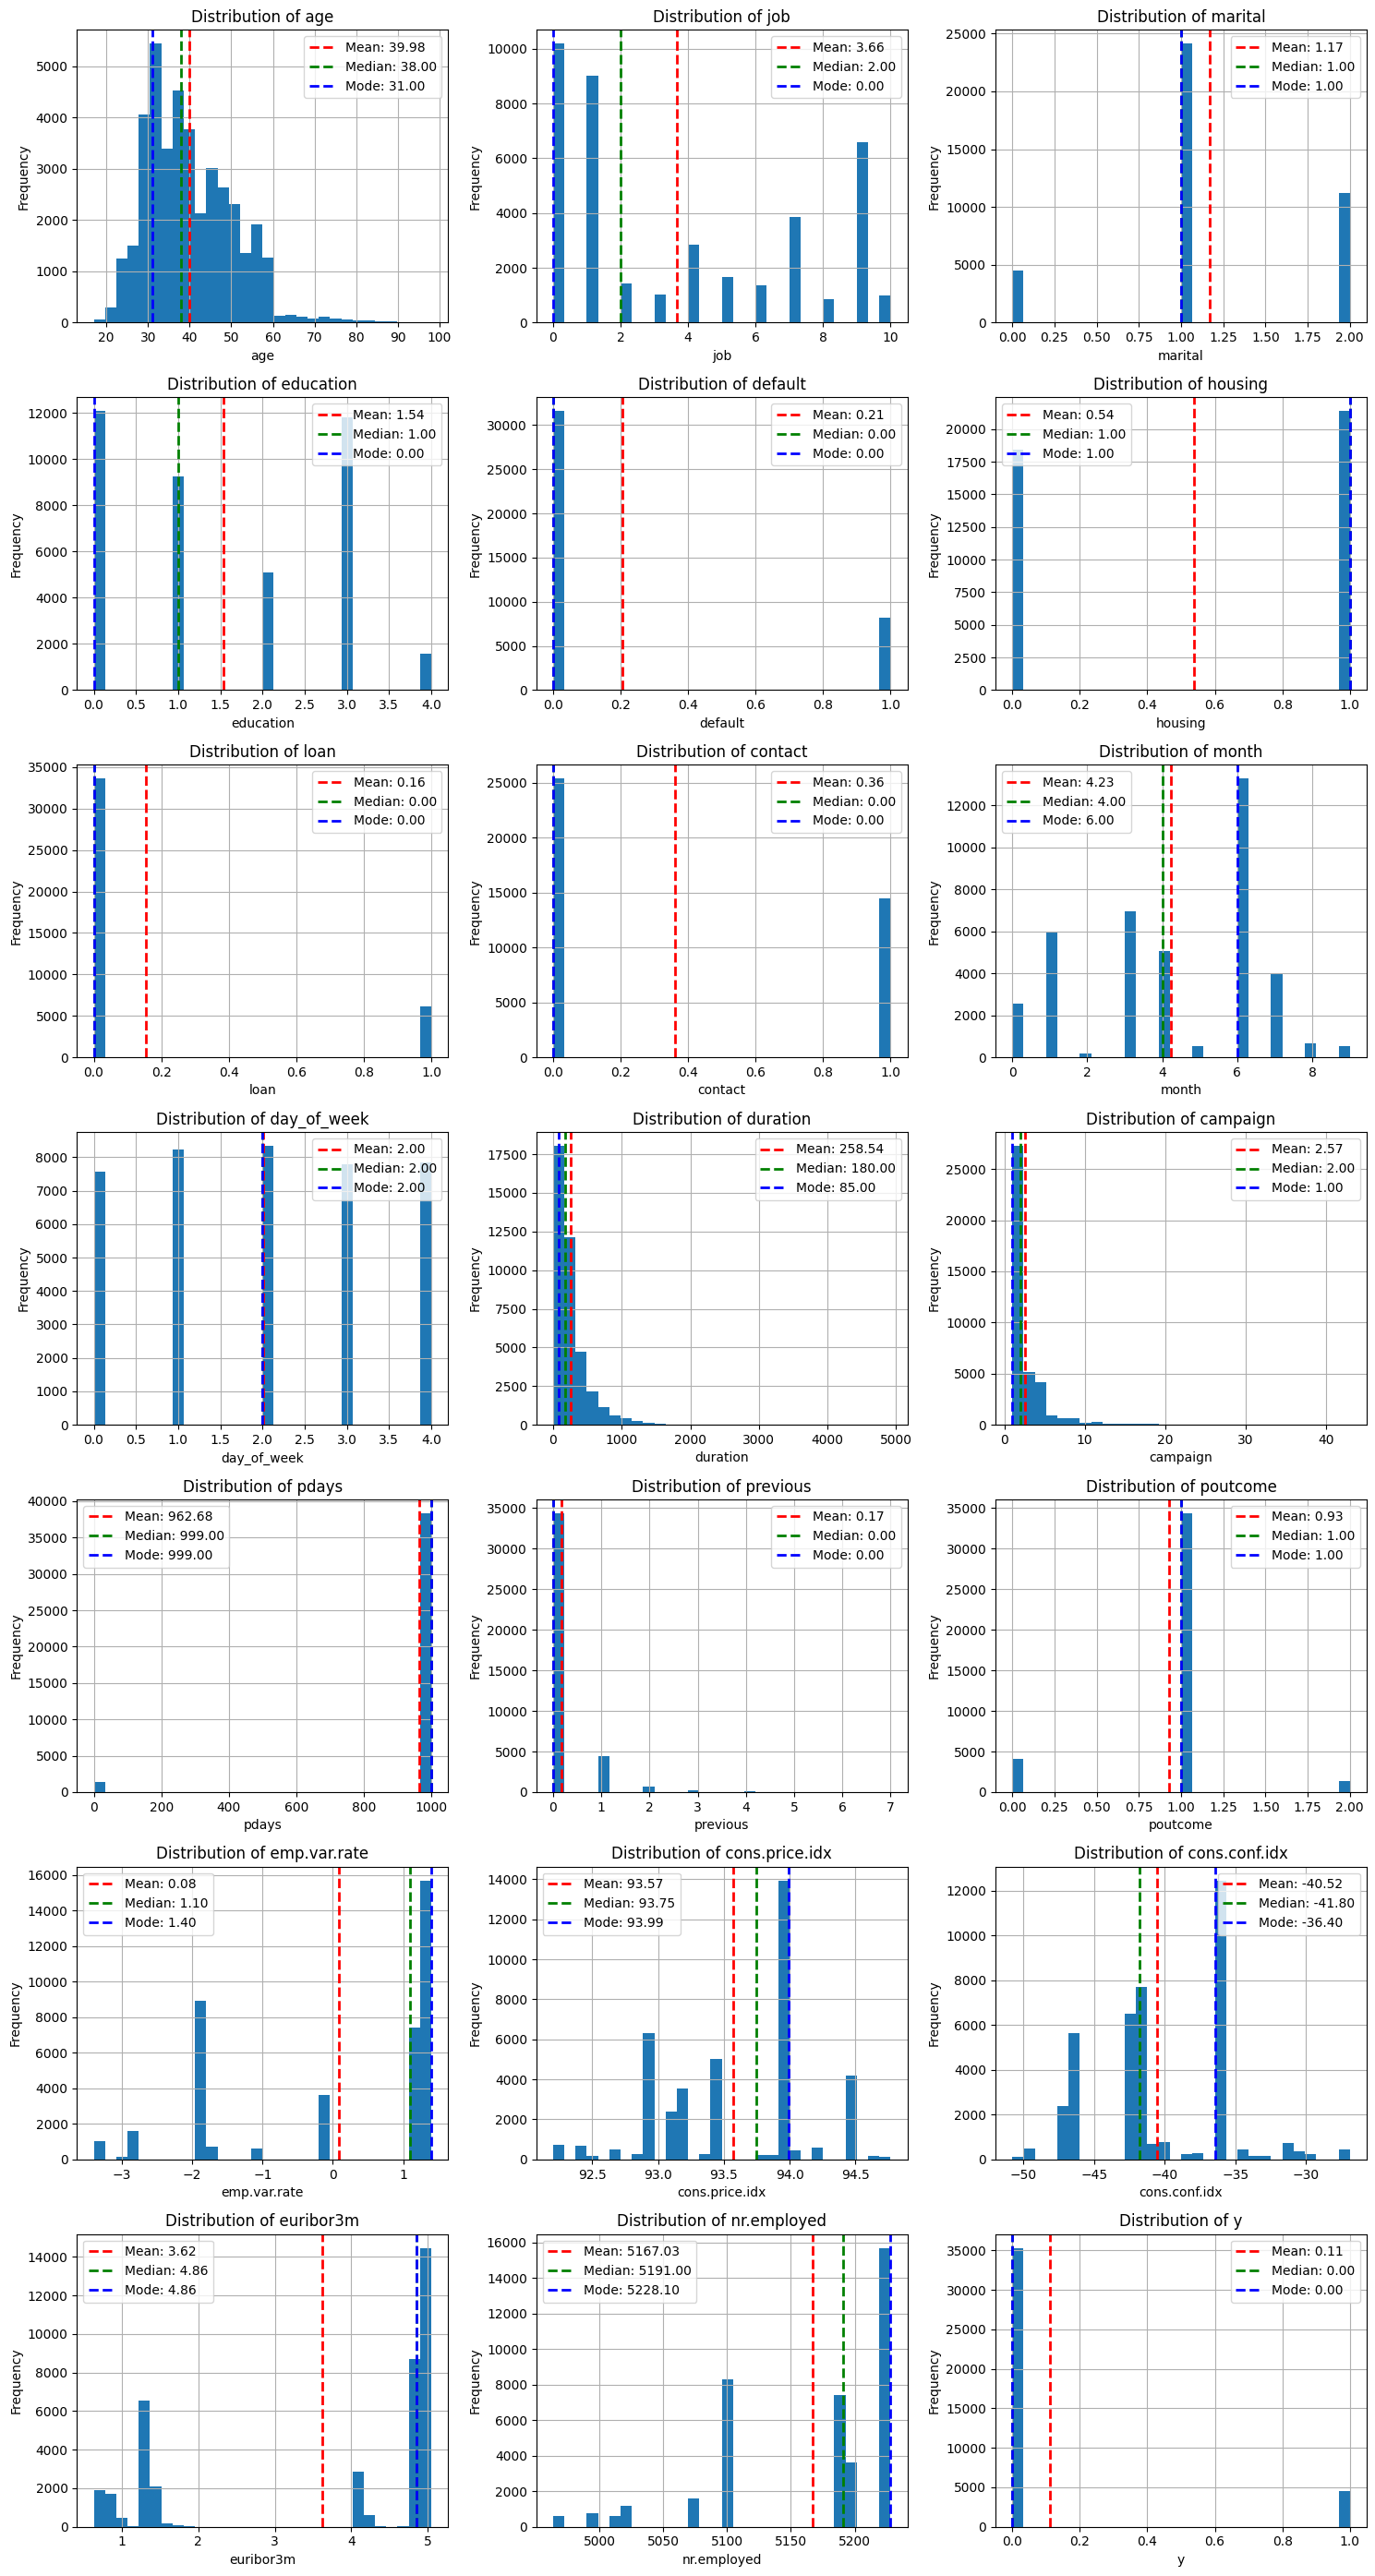

In [ ]:

numerical_cols = df.select_dtypes(include=np.number).columns
n_cols = len(numerical_cols)


n_plots_per_row = 3

n_rows = math.ceil(n_cols / n_plots_per_row)


fig, axes = plt.subplots(n_rows, n_plots_per_row, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]

    df[col].hist(bins=30, ax=ax)

    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]

    ax.axvline(mean_val, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.axvline(mode_val, color='b', linestyle='dashed', linewidth=2, label=f'Mode: {mode_val:.2f}')

    ax.legend()

for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

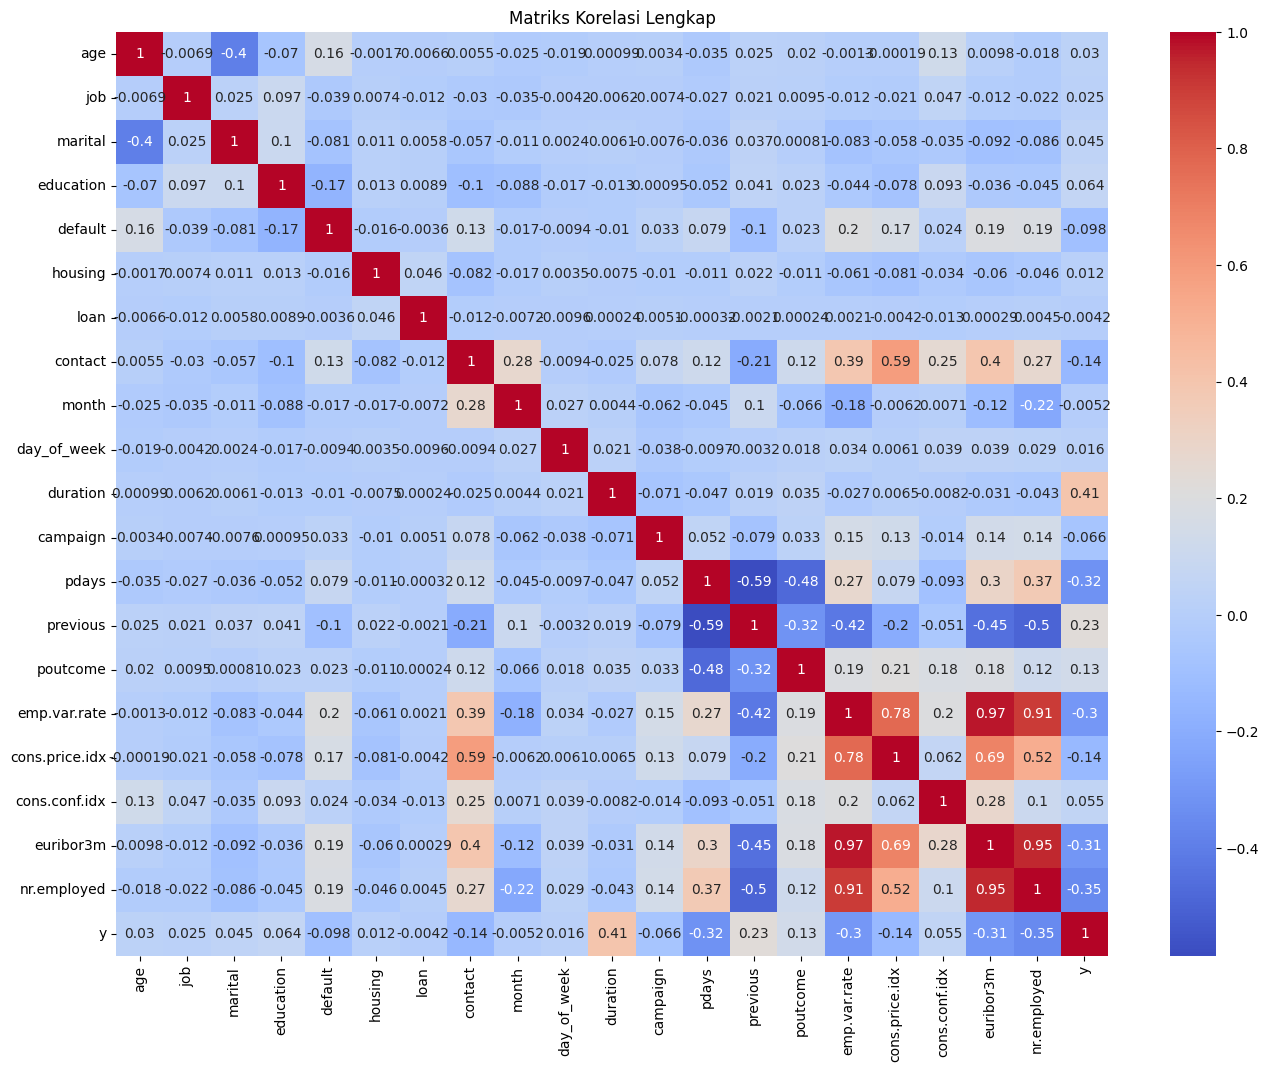

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Lengkap')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39803 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39803 non-null  int64  
 1   job             39803 non-null  int64  
 2   marital         39803 non-null  int64  
 3   education       39803 non-null  int64  
 4   default         39803 non-null  int64  
 5   housing         39803 non-null  int64  
 6   loan            39803 non-null  int64  
 7   contact         39803 non-null  int64  
 8   month           39803 non-null  int64  
 9   day_of_week     39803 non-null  int64  
 10  duration        39803 non-null  int64  
 11  campaign        39803 non-null  int64  
 12  pdays           39803 non-null  int64  
 13  previous        39803 non-null  int64  
 14  poutcome        39803 non-null  int64  
 15  emp.var.rate    39803 non-null  float64
 16  cons.price.idx  39803 non-null  float64
 17  cons.conf.idx   39803 non-null  floa

# Splitting Dataset

In [ ]:
X = df.drop(columns=['y'], axis = 1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Resampling Data

### Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()

x_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_train_under).value_counts())

y
0    3601
1    3601
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


cols = x_train_under.columns


sc = StandardScaler()


x_train_under_scaled = sc.fit_transform(x_train_under)
x_test_under_scaled = sc.transform(X_test)


x_train_under = pd.DataFrame(x_train_under_scaled, columns=cols, index=x_train_under.index)
x_test_under = pd.DataFrame(x_test_under_scaled, columns=cols, index=X_test.index)

In [ ]:
# from sklearn.decomposition import PCA


# pca = PCA(n_components=1)


# cols_to_reduce = ['emp.var.rate', 'euribor3m', 'nr.employed']


# x_train_under = x_train_under.copy()
# x_test_under = x_test_under.copy()


# x_train_under['pca_combined'] = pca.fit_transform(x_train_under[cols_to_reduce])
# x_test_under['pca_combined'] = pca.transform(x_test_under[cols_to_reduce])


# x_train_under = x_train_under.drop(columns=cols_to_reduce)
# x_test_under = x_test_under.drop(columns=cols_to_reduce)


# display(x_train_under.head())
# display(x_test_under.head())

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model_rf.fit(x_train_under, y_train_under)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, oob_score=True)
# model_rf.fit(X_train, y_train)

In [ ]:
y_pred = model_rf.predict(x_test_under)

In [ ]:
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    "NuSVC",
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000),
    SVC(kernel='rbf', probability=True, random_state=42),
    NuSVC(probability=True),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

for name, clf in zip(names, classifiers):
    print(f"Training {name}...")
    clf.fit(x_train_under, y_train_under)

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training NuSVC...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
for name, clf in zip(names, classifiers):
    print(f"Evaluating {name}...")
    y_pred = clf.predict(x_test_under)

    print(classification_report(y_test, y_pred))
    print("\n")

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7075
           1       0.43      0.87      0.57       886

    accuracy                           0.86      7961
   macro avg       0.71      0.86      0.74      7961
weighted avg       0.92      0.86      0.88      7961



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7075
           1       0.39      0.81      0.52       886

    accuracy                           0.83      7961
   macro avg       0.68      0.82      0.71      7961
weighted avg       0.91      0.83      0.86      7961



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7075
           1       0.42      0.87      0.57       886

    accuracy                           0.85      7961
   macro avg       0.70      0.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

#

# Classification Report Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Precision: 0.3942
Recall: 0.8262
F1-Score: 0.5337

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7075
           1       0.39      0.83      0.53       886

    accuracy                           0.84      7961
   macro avg       0.68      0.83      0.72      7961
weighted avg       0.91      0.84      0.86      7961



In [ ]:
# from sklearn.preprocessing import LabelEncoder

# categorical_cols = df.select_dtypes(include=['object']).columns
# label_encoder = LabelEncoder()

# for col in categorical_cols:
#     df[col] = label_encoder.fit_transform(df[col])

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_train_smote).value_counts())

y
0    28241
1    28241
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


sc = StandardScaler()

x_train_smote = sc.fit_transform(x_train_smote)
x_test_smote = sc.transform(X_test)



In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model_rf.fit(x_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = model_rf.predict(x_test_smote)

In [ ]:
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    "NuSVC",
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000),
    SVC(kernel='rbf', probability=True, random_state=42),
    NuSVC(probability=True),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

for name, clf in zip(names, classifiers):
    print(f"Training {name}...")
    clf.fit(x_train_smote, y_train_smote)

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training NuSVC...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
for name, clf in zip(names, classifiers):
    print(f"Evaluating {name}...")
    y_pred = clf.predict(x_test_smote)

    print(classification_report(y_test, y_pred))
    print("\n")

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7075
           1       0.44      0.75      0.56       886

    accuracy                           0.87      7961
   macro avg       0.71      0.82      0.74      7961
weighted avg       0.91      0.87      0.88      7961



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7075
           1       0.44      0.66      0.53       886

    accuracy                           0.87      7961
   macro avg       0.70      0.78      0.73      7961
weighted avg       0.90      0.87      0.88      7961



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7075
           1       0.44      0.74      0.55       886

    accuracy                           0.86      7961
   macro avg       0.70      0.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

#

# Classification Report Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.4810
Recall: 0.5858
F1-Score: 0.5282

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7075
           1       0.48      0.59      0.53       886

    accuracy                           0.88      7961
   macro avg       0.71      0.75      0.73      7961
weighted avg       0.89      0.88      0.89      7961



### Nearmiss Undersampling

In [ ]:
# import the NearMiss object.
from imblearn.under_sampling import NearMiss

# create the object with auto
near = NearMiss(sampling_strategy="not minority")

# fit the object to the training data.
x_train_near, y_train_near = near.fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_train_near).value_counts())

y
0    3601
1    3601
Name: count, dtype: int64


In [ ]:
sc = StandardScaler()
x_train_near = sc.fit_transform(x_train_near)
x_test_near = sc.transform(X_test)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model_rf.fit(x_train_near, y_train_near)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = model_rf.predict(x_test_near)

In [ ]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    "NuSVC",
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000),
    SVC(kernel='rbf', probability=True, random_state=42),
    NuSVC(probability=True),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

for name, clf in zip(names, classifiers):
    print(f"Training {name}...")
    clf.fit(x_train_near, y_train_near)



Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training NuSVC...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
for name, clf in zip(names, classifiers):
    print(f"Evaluating {name}...")
    y_pred = clf.predict(x_test_near)

    print(classification_report(y_test, y_pred))
    print("\n")

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7075
           1       0.44      0.76      0.56       886

    accuracy                           0.87      7961
   macro avg       0.70      0.82      0.74      7961
weighted avg       0.91      0.87      0.88      7961



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      7075
           1       0.22      0.67      0.33       886

    accuracy                           0.70      7961
   macro avg       0.58      0.69      0.57      7961
weighted avg       0.86      0.70      0.75      7961



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7075
           1       0.44      0.76      0.56       886

    accuracy                           0.87      7961
   macro avg       0.71      0.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

#

# Classification Report Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.2199
Recall: 0.7720
F1-Score: 0.3423

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      7075
           1       0.22      0.77      0.34       886

    accuracy                           0.67      7961
   macro avg       0.59      0.71      0.56      7961
weighted avg       0.88      0.67      0.73      7961



### TomekLinks

In [ ]:
# import the TomekLinks object.
from imblearn.under_sampling import TomekLinks

# instantiate the object with the right ratio strategy.
tomek_links = TomekLinks(sampling_strategy='majority')

# fit the object to the training data.
x_train_tl, y_train_tl = tomek_links.fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_train_tl).value_counts())

y
0    27224
1     3601
Name: count, dtype: int64


In [ ]:
sc = StandardScaler()
x_train_tl = sc.fit_transform(x_train_tl)
x_test_tl = sc.transform(X_test)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model_rf.fit(x_train_tl, y_train_tl)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = model_rf.predict(x_test_tl)

In [ ]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    # "NuSVC",
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000),
    SVC(kernel='rbf', probability=True, random_state=42),
    # NuSVC(probability=True),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

for name, clf in zip(names, classifiers):
    print(f"Training {name}...")
    clf.fit(x_train_tl, y_train_tl)

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
for name, clf in zip(names, classifiers):
    print(f"Evaluating {name}...")
    y_pred = clf.predict(x_test_tl)

    print(classification_report(y_test, y_pred))
    print("\n")

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7075
           1       0.62      0.51      0.56       886

    accuracy                           0.91      7961
   macro avg       0.78      0.74      0.76      7961
weighted avg       0.90      0.91      0.91      7961



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7075
           1       0.55      0.47      0.51       886

    accuracy                           0.90      7961
   macro avg       0.74      0.71      0.72      7961
weighted avg       0.89      0.90      0.89      7961



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7075
           1       0.66      0.45      0.53       886

    accuracy                           0.91      7961
   macro avg       0.79      0.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

#

# Classification Report Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.5005
Recall: 0.6072
F1-Score: 0.5487

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      7075
           1       0.50      0.61      0.55       886

    accuracy                           0.89      7961
   macro avg       0.72      0.77      0.74      7961
weighted avg       0.90      0.89      0.89      7961



### ENN Rule

In [ ]:
import joblib

# Identify the best model and resampling method (Based on the evaluation reports)
# In this case, it appears to be the Random Forest model trained on SMOTEENN data

best_model = classifiers[names.index("Random Forest")] # Select the Random Forest model
# Assuming the last trained model was on SMOTEENN data (x_train_smtenn, y_train_smtenn) based on the notebook flow.
# If not, you would need to retrain the Random Forest model specifically on the SMOTEENN data.
# best_model.fit(x_train_smtenn, y_train_smtenn) # This might be needed if the last trained model was not RF on SMOTEENN

# Save the best model
joblib.dump(best_model, 'best_random_forest_smoteenn_model.pkl')

print("Best model (Random Forest with SMOTEENN) exported successfully as 'best_random_forest_smoteenn_model.pkl'")

Best model (Random Forest with SMOTEENN) exported successfully as 'best_random_forest_smoteenn_model.pkl'


In [ ]:
# import the EditedNearestNeighbours object.
from imblearn.under_sampling import EditedNearestNeighbours

# create the object to resample the majority class.
enn = EditedNearestNeighbours(sampling_strategy="majority")

# fit the object to the training data.
x_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_train_enn).value_counts())

y
0    24633
1     3601
Name: count, dtype: int64


In [ ]:
sc = StandardScaler()
x_train_enn = sc.fit_transform(x_train_enn)
x_test_enn = sc.transform(X_test)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model_rf.fit(x_train_enn, y_train_enn)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = model_rf.predict(x_test_enn)

In [ ]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    # "NuSVC",
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000),
    SVC(kernel='rbf', probability=True, random_state=42),
    # NuSVC(probability=True),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

for name, clf in zip(names, classifiers):
    print(f"Training {name}...")
    clf.fit(x_train_enn, y_train_enn)

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
for name, clf in zip(names, classifiers):
    print(f"Evaluating {name}...")
    y_pred = clf.predict(x_test_enn)

    print(classification_report(y_test, y_pred))
    print("\n")

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7075
           1       0.52      0.70      0.59       886

    accuracy                           0.89      7961
   macro avg       0.74      0.81      0.77      7961
weighted avg       0.91      0.89      0.90      7961



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7075
           1       0.53      0.65      0.58       886

    accuracy                           0.90      7961
   macro avg       0.74      0.79      0.76      7961
weighted avg       0.91      0.90      0.90      7961



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7075
           1       0.54      0.68      0.60       886

    accuracy                           0.90      7961
   macro avg       0.75      0.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

#

# Classification Report Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.4890
Recall: 0.7810
F1-Score: 0.6015

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7075
           1       0.49      0.78      0.60       886

    accuracy                           0.88      7961
   macro avg       0.73      0.84      0.77      7961
weighted avg       0.92      0.88      0.90      7961



### Neighborhood Cleaning Rule

In [ ]:
# import the NeighbourhoodCleaningRule object.
from imblearn.under_sampling import NeighbourhoodCleaningRule

# create the object to resample the majority class.
ncr = NeighbourhoodCleaningRule(sampling_strategy="majority")

# fit the object to the training data.
x_train_ncr, y_train_ncr = ncr.fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_train_ncr).value_counts())

y
0    24793
1     3601
Name: count, dtype: int64


In [ ]:
sc = StandardScaler()
x_train_ncr = sc.fit_transform(x_train_ncr)
x_test_ncr = sc.transform(X_test)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model_rf.fit(x_train_ncr, y_train_ncr)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = model_rf.predict(x_test_ncr)

In [ ]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    # "NuSVC",
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000),
    SVC(kernel='rbf', probability=True, random_state=42),
    # NuSVC(probability=True),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

for name, clf in zip(names, classifiers):
    print(f"Training {name}...")
    clf.fit(x_train_ncr, y_train_ncr)

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
for name, clf in zip(names, classifiers):
    print(f"Evaluating {name}...")
    y_pred = clf.predict(x_test_ncr)

    print(classification_report(y_test, y_pred))
    print("\n")

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7075
           1       0.54      0.67      0.60       886

    accuracy                           0.90      7961
   macro avg       0.75      0.80      0.77      7961
weighted avg       0.91      0.90      0.90      7961



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7075
           1       0.53      0.62      0.57       886

    accuracy                           0.90      7961
   macro avg       0.74      0.77      0.75      7961
weighted avg       0.90      0.90      0.90      7961



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7075
           1       0.56      0.65      0.60       886

    accuracy                           0.90      7961
   macro avg       0.76      0.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

#

# Classification Report Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.4885
Recall: 0.7664
F1-Score: 0.5967

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7075
           1       0.49      0.77      0.60       886

    accuracy                           0.88      7961
   macro avg       0.73      0.83      0.76      7961
weighted avg       0.92      0.88      0.90      7961



### Random Oversampling

In [ ]:
# import the Random Over Sampler object.
from imblearn.over_sampling import RandomOverSampler

# create the object.
over_sampler = RandomOverSampler()

# fit the object to the training data.
x_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_train_over).value_counts())

y
0    28241
1    28241
Name: count, dtype: int64


In [ ]:
sc = StandardScaler()
x_train_over = sc.fit_transform(x_train_over)
x_test_over = sc.transform(X_test)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model_rf.fit(x_train_over, y_train_over)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = model_rf.predict(x_test_over)

In [ ]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    # "NuSVC",
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000),
    SVC(kernel='rbf', probability=True, random_state=42),
    # NuSVC(probability=True),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

for name, clf in zip(names, classifiers):
    print(f"Training {name}...")
    clf.fit(x_train_over, y_train_over)

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
for name, clf in zip(names, classifiers):
    print(f"Evaluating {name}...")
    y_pred = clf.predict(x_test_over)

    print(classification_report(y_test, y_pred))
    print("\n")

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7075
           1       0.43      0.87      0.57       886

    accuracy                           0.86      7961
   macro avg       0.70      0.86      0.74      7961
weighted avg       0.92      0.86      0.88      7961



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      7075
           1       0.41      0.71      0.52       886

    accuracy                           0.85      7961
   macro avg       0.69      0.79      0.72      7961
weighted avg       0.90      0.85      0.87      7961



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7075
           1       0.42      0.87      0.57       886

    accuracy                           0.85      7961
   macro avg       0.70      0.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

#

# Classification Report Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.5235
Recall: 0.4786
F1-Score: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7075
           1       0.52      0.48      0.50       886

    accuracy                           0.89      7961
   macro avg       0.73      0.71      0.72      7961
weighted avg       0.89      0.89      0.89      7961



### ADASYN

In [ ]:
# import the ADASYN object.
from imblearn.over_sampling import ADASYN

# create the object to resample the majority class.
adasyn = ADASYN(sampling_strategy="minority")

# fit the object to the training data.
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_train_adasyn).value_counts())

y
0    28241
1    28095
Name: count, dtype: int64


In [ ]:
sc = StandardScaler()
x_train_adasyn = sc.fit_transform(x_train_adasyn)
x_test_adasyn = sc.transform(X_test)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model_rf.fit(x_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = model_rf.predict(x_test_adasyn)

In [ ]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    # "NuSVC",
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000),
    SVC(kernel='rbf', probability=True, random_state=42),
    # NuSVC(probability=True),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

for name, clf in zip(names, classifiers):
    print(f"Training {name}...")
    clf.fit(x_train_adasyn, y_train_adasyn)

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
for name, clf in zip(names, classifiers):
    print(f"Evaluating {name}...")
    y_pred = clf.predict(x_test_adasyn)

    print(classification_report(y_test, y_pred))
    print("\n")

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      7075
           1       0.42      0.77      0.54       886

    accuracy                           0.86      7961
   macro avg       0.69      0.82      0.73      7961
weighted avg       0.91      0.86      0.87      7961



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      7075
           1       0.43      0.68      0.53       886

    accuracy                           0.86      7961
   macro avg       0.69      0.78      0.72      7961
weighted avg       0.90      0.86      0.88      7961



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7075
           1       0.42      0.77      0.54       886

    accuracy                           0.85      7961
   macro avg       0.69      0.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

#

# Classification Report Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.4691
Recall: 0.5474
F1-Score: 0.5052

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7075
           1       0.47      0.55      0.51       886

    accuracy                           0.88      7961
   macro avg       0.71      0.73      0.72      7961
weighted avg       0.89      0.88      0.88      7961



### SMOTE & Tomek Links

In [ ]:
# import the SMOTETomek.
from imblearn.combine import SMOTETomek

# create the  object with the desired sampling strategy.
smotemek = SMOTETomek(sampling_strategy='auto')

# fit the object to our training data.
x_train_smt, y_train_smt = smotemek.fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_train_smt).value_counts())

y
0    28068
1    28068
Name: count, dtype: int64


In [ ]:
sc = StandardScaler()
x_train_smt = sc.fit_transform(x_train_smt)
x_test_smt = sc.transform(X_test)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model_rf.fit(x_train_smt, y_train_smt)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = model_rf.predict(x_test_smt)

In [ ]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    # "NuSVC",
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000),
    SVC(kernel='rbf', probability=True, random_state=42),
    # NuSVC(probability=True),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

for name, clf in zip(names, classifiers):
    print(f"Training {name}...")
    clf.fit(x_train_smt, y_train_smt)

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
for name, clf in zip(names, classifiers):
    print(f"Evaluating {name}...")
    y_pred = clf.predict(x_test_smt)

    print(classification_report(y_test, y_pred))
    print("\n")

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7075
           1       0.45      0.76      0.56       886

    accuracy                           0.87      7961
   macro avg       0.71      0.82      0.74      7961
weighted avg       0.91      0.87      0.88      7961



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      7075
           1       0.45      0.67      0.54       886

    accuracy                           0.87      7961
   macro avg       0.70      0.79      0.73      7961
weighted avg       0.90      0.87      0.88      7961



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7075
           1       0.44      0.75      0.56       886

    accuracy                           0.87      7961
   macro avg       0.70      0.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

#

# Classification Report Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.4863
Recall: 0.6005
F1-Score: 0.5374

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7075
           1       0.49      0.60      0.54       886

    accuracy                           0.88      7961
   macro avg       0.72      0.76      0.74      7961
weighted avg       0.90      0.88      0.89      7961



### SMOTE & Edited Nearest Neighbor

In [ ]:
# import the SMOTEENN.
from imblearn.combine import SMOTEENN

# create the  object with the desired samplig strategy.
smoenn = SMOTEENN(sampling_strategy='minority')

# fit the object to our training data.
x_train_smtenn, y_train_smtenn = smoenn.fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_train_smtenn).value_counts())

y
1    26931
0    23319
Name: count, dtype: int64


In [ ]:
sc = StandardScaler()
x_train_smtenn = sc.fit_transform(x_train_smtenn)
x_test_smtenn = sc.transform(X_test)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model_rf.fit(x_train_smtenn, y_train_smtenn)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = model_rf.predict(x_test_smtenn)

In [ ]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    # "NuSVC",
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000),
    SVC(kernel='rbf', probability=True, random_state=42),
    # NuSVC(probability=True),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

for name, clf in zip(names, classifiers):
    print(f"Training {name}...")
    clf.fit(x_train_smtenn, y_train_smtenn)

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
for name, clf in zip(names, classifiers):
    print(f"Evaluating {name}...")
    y_pred = clf.predict(x_test_smtenn)

    print(classification_report(y_test, y_pred))
    print("\n")

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      7075
           1       0.40      0.88      0.55       886

    accuracy                           0.84      7961
   macro avg       0.69      0.86      0.73      7961
weighted avg       0.92      0.84      0.86      7961



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7075
           1       0.43      0.79      0.56       886

    accuracy                           0.86      7961
   macro avg       0.70      0.83      0.74      7961
weighted avg       0.91      0.86      0.88      7961



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      7075
           1       0.40      0.87      0.55       886

    accuracy                           0.84      7961
   macro avg       0.69      0.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

#

# Classification Report Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.4599
Recall: 0.8217
F1-Score: 0.5897

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.92      7075
           1       0.46      0.82      0.59       886

    accuracy                           0.87      7961
   macro avg       0.72      0.85      0.76      7961
weighted avg       0.92      0.87      0.89      7961

